In [1]:
import torch
from torch.nn import CrossEntropyLoss, Sigmoid, ReLU, Softsign
from TrainingEnvironments.FeedForwardTrainingEnvironment import FeedForwardTrainingEnvironment
from Datasets.GaussianSample import GaussianData

from Models.MLP import MLP
import torch.optim as optim 

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Constant Model Parameters
midpoint_collection = {

    2: torch.tensor([
            [.2, .8],
            [.8, .2]
        ]),

    3: torch.tensor([
            [.2, .8],
            [.5, .5],
            [.8, .2]
        ]),

    4: torch.tensor([
            [.2, .2],
            [.2, .8],
            [.8, .2],
            [.8,.8]
        ]),

    5: torch.tensor([
            [.2, .2],
            [.2, .8],
            [.5, .5],
            [.8, .2],
            [.8,.8]
        ]),

    6: torch.tensor([
            [.2, .2],
            [.2, .5],
            [.2, .8],
            [.8, .2],
            [.8, .5],
            [.8,.8]
    ]),

    9: torch.tensor([
            [.2, .2],
            [.2, .5],
            [.2, .8],
            [.5, .2],
            [.5, .5],
            [.5, .8],
            [.8, .2],
            [.8, .5],
            [.8,.8]
    ]),

}

nineCaseLabels = {

    1: torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8]),

    2: torch.tensor([0, 1, 0, 1, 0, 1, 0, 1, 0]),

    3: torch.tensor([1, 2, 3, 2, 3, 1, 3, 1, 2])

}

# Visualise Data

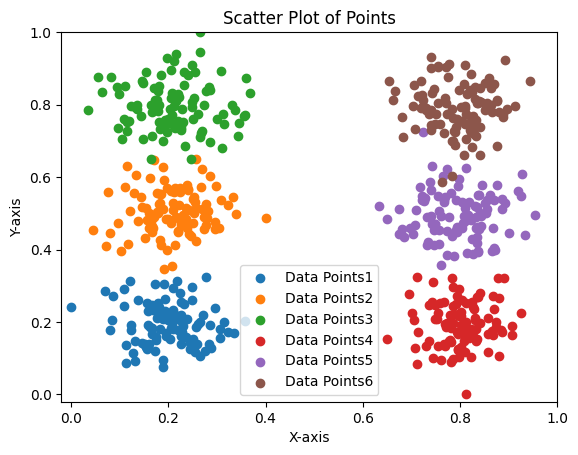

In [3]:
midpoints = midpoint_collection[6]
labels = torch.tensor(range(6))
data = GaussianData(midpoints, labels, (1/16))
data.showData()

# Experiment 1

In [4]:
# # Independent Variables
# activation_function = ReLU
# midpoints = midpoint_collection[9]
# labels = nineCaseLabels[2]

# data = GaussianData(midpoints, labels, (1/16))
# validationIndex = torch.randint(0, len(midpoints), (300,))
# validationX, validationY = data.__getitem__(validationIndex)

# model = MLP(midpoints.shape[1], [12, 12], max(labels)+1, activation_function)
# optimizer = optim.Adam(model.parameters(), lr=0.01)

# # Creation and Running of Training Environment
# Experiment1 = FeedForwardTrainingEnvironment(data, validationX, validationY, model, criterion, optimizer, epochs, batchsize)
# loss_data, accuracy_data, activation_data, decision_boundary_data = Experiment1.trainModel()

In [ ]:
# Independent Variables
trials = 1
epochs = 5000
batchsizes = [10, 25, 50, 75, 100]

midpoints = midpoint_collection[9]
labels = nineCaseLabels[2]
variances = [1/16]

hidden_shapes =  [
    [2],
    [4],
    [8],
    [16],
    [2,2],
    [4,4],
    [8,8],
    [16, 16]
]

activation_functions = [Sigmoid, Softsign, ReLU]

criterion = CrossEntropyLoss()
lr_list = [.01]

for trial in range(trials):

    for variance in variances:

        data = GaussianData(midpoints, labels, variance)
        validationIndex = torch.randint(0, len(midpoints), (300,))
        validationX, validationY = data.__getitem__(validationIndex)

        for hidden_shape in hidden_shapes:
            for act_func in range(len(activation_functions)):
                for lr in lr_list:
                    for batchsize in batchsizes:

                        model = MLP(midpoints.shape[1], hidden_shape, max(labels)+1, activation_functions[act_func])
                        optimizer = optim.Adam(model.parameters(), lr=lr)

                        # Creation and Running of Training Environment
                        Experiment1 = FeedForwardTrainingEnvironment(data, validationX, validationY, model, criterion, optimizer, epochs, batchsize)
                        loss_data, accuracy_data, activation_data, decision_boundary_data = Experiment1.trainModel()

                        torch.save(loss_data, f"CollectedData/010101010_data/{trial+1}_{variance}_{len(hidden_shape)}_{hidden_shape[0]}_{act_func+1}_{lr}_{batchsize}_loss_data.pt")
                        torch.save(accuracy_data, f"CollectedData/010101010_data/{trial+1}_{variance}_{len(hidden_shape)}_{hidden_shape[0]}_{act_func+1}_{lr}_{batchsize}_accuracy_data.pt")
                        torch.save(activation_data, f"CollectedData/010101010_data/{trial+1}_{variance}_{len(hidden_shape)}_{hidden_shape[0]}_{act_func+1}_{lr}_{batchsize}_activation_data.pt")
                        torch.save(decision_boundary_data, f"CollectedData/010101010_data/{trial+1}_{variance}_{len(hidden_shape)}_{hidden_shape[0]}_{act_func+1}_{lr}_{batchsize}_decision_boundary_data.pt")


C:\Users\Conka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torch\functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:3638.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


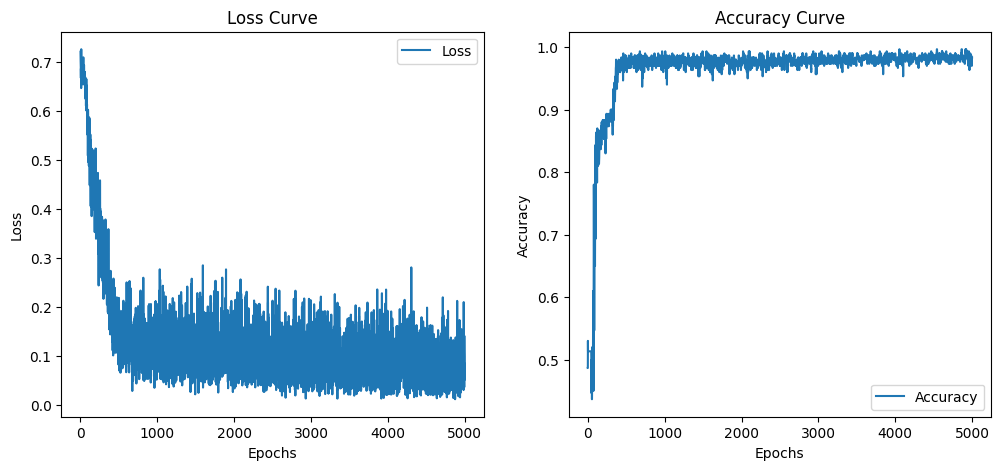

In [6]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_data, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracy_data, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

In [7]:

# def makeAnimation(self, data):
    
#     def update(epoch):
#         img.set_data(data[epoch])
#         ax.set_title(f"Epoch {epoch*5}")
#         return [img]

#     # Plot setup
#     fig, ax = plt.subplots()
#     cmap = plt.cm.coolwarm
#     img = ax.imshow(data[0], extent=(0, 1, 0, 1), origin='lower', cmap=cmap, vmin=0, vmax=len(self.Dataset))
#     ax.set_title("Epoch 0")
#     ax.set_xlabel("x")
#     ax.set_ylabel("y")

#     ani = animation.FuncAnimation(fig, update, frames=self.Epoch//5, interval=100, blit=True)
#     plt.show()

#     # # Optional: Save it
#     ani.save("decision_boundary_evolution.gif", writer='pillow')